# Seaborn and Pandas

In this notebook we will introduce you to the library Seaborn. Seaborn is a library that is built on top of Matplotlib, and enables you to effectively and conveniently generate aesthetically pleasing graphs from data that is stored in Pandas DataFrames. We will first show you how to use Seaborn, and then quickly move on to an exercise in which you will explore and visualise the properties of a dataset.

## What is Seaborn and how does it work?

Seaborn is a library for making statistical graphs in Python. As mentioned above, it is built on top of Matplotlib and highly customizable using the same Matplotlib functions you already know. Seaborn is usually imported as:

```python
    import seaborn as sns
```   
 
In the cells below, we will give you an example of what Seaborn can do:

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load an example dataset from the internet
tips = sns.load_dataset("tips")

# Tips is an ordinary pandas DataFrame, so we can display it
display(tips)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


To make testing and explaining Seaborn's built-in ways to visualize data easier, Seaborn has an integrated function that can download an example dataset from the internet:

```python
# Load an example dataset from the internet
tips = sns.load_dataset("tips")
```

You will often see this function being used in online examples. There’s nothing special about these datasets: they are just pandas dataframes, and we could have loaded them with `pd.read_csv()` or built them by hand.

This particular dataset holds data of parties of restaurant visitors, which we will use throughout our examples. It includes data on:

- `total_bill`: the total bill in dollars
- `tip`: the tip in dollars
- `sex`: the sex of the bill payer
- `smoker`: whether there were smokers in the party
- `day`: day of the week in short notation
- `time`: time of day (lunch or dinner)
- `size`: number of persons in the party

Using Seaborn's `relplot()`, we can easily show the relationship between multiple variables:

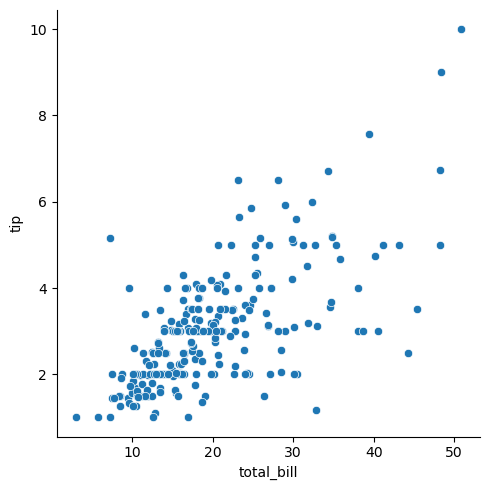

In [2]:
# Create a simple graph comparing the total bill to the tip size
sns.relplot(
    data=tips,
    x="total_bill", 
    y="tip"
)

# Show the resulting plot!
plt.show()

Notice how we provided only the names of the variables and their roles in the plot:
- First, we tell `relplot()` to use our DataFrame `tips` as it datasource.
- The horizontal axis (`x`) is told to use the column `"total_bill"`
- The vertical axis (`y`) is told to use the column `"tip"`

> Unlike when using matplotlib directly, it wasn’t necessary to specify attributes of the plot elements in terms of the color values or marker codes. Behind the scenes, Seaborn handled the translation from values in the dataframe to arguments that matplotlib understands. In fact, it sets all these attributes for you in matplotlib, and they are still accessible through `plt`. Which is how we can still use matplotlib's `plt.show()` to show our figure to the screen! You are even still able custimize the plot; for example, we can change the title before showing the figure by calling `plt.title()`.

We can even easily separate different classes in the data visually by adding different arguments to the call to `relplot()`:

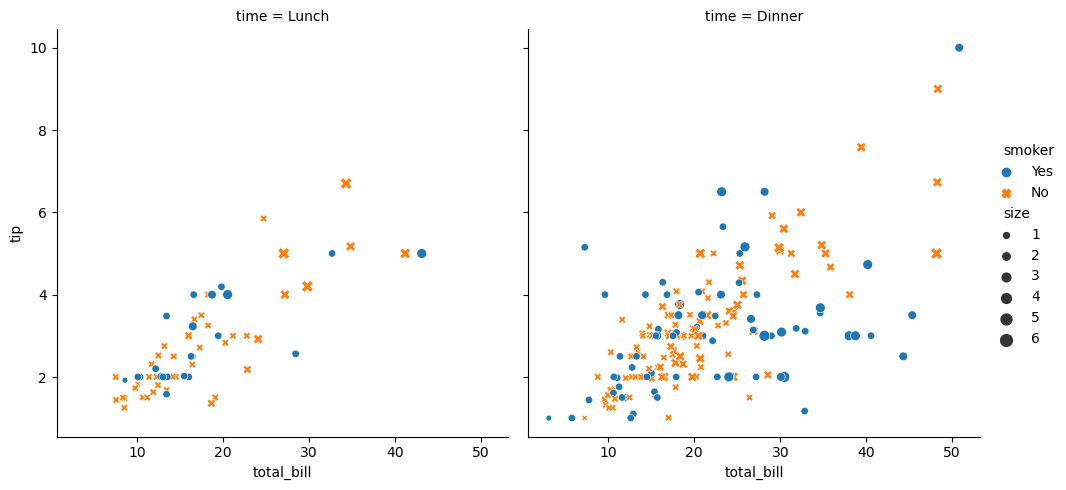

In [3]:
sns.relplot(
    data=tips,
    x="total_bill", 
    y="tip", 
    hue="smoker", 
    style="smoker", 
    size="size",
    col="time"
)

plt.show()

In the code above:
- `hue="smoker"`: sets the colour of each datapoint to be dependant on the value in the column `"smoker"`. Since the `"smoker"` column only has two possible nominal values ("Yes" or "No"), the datapoints each get assigned either blue or orange. When there are more than a couple different possible values and values are numerical, Seaborn will automatically opt for a colour that increases in darkness as the value increases. Ranging from white for low values, black at high values, and purple for values in between. You can try this yourself by replacing the assigned `hue` column with `"size"`.
- `style="smoker"`: sets the column `"smoker"` as the grouping variable that will produce datapoints with different styles/glyphs. In this specific case "Yes" is automatically set to a circle, while "No" is set to a cross.
- `size="size"`: sets the size of each glyph representing a datapoint to the value defined in the column `"size"`.
- `col="time"`: defines that for each category in the column `"time"` there should be a subplot with only data for that specific category. Each subplot is positioned _columnwise_ next to the last, with its own title. You can also use `row="time"` to plot each subplot vertically!

`relplot()` has many of these keyword arguments, which can all be found in the [seaborn documentation for `relplot()`](https://seaborn.pydata.org/generated/seaborn.relplot.html). If you scroll down, you will even find many different examples that use different keyword arguments!

## Other types of plots

Of course there are many more types (and subtypes) of plots that can be used to display your data. We will give a couple examples below, but for a quick overview of the types of graphs that Seaborn can create, take a look at their [example gallery](https://seaborn.pydata.org/examples/index.html). The three main figures you will be most likely to use, and their variants, are found in the image below.

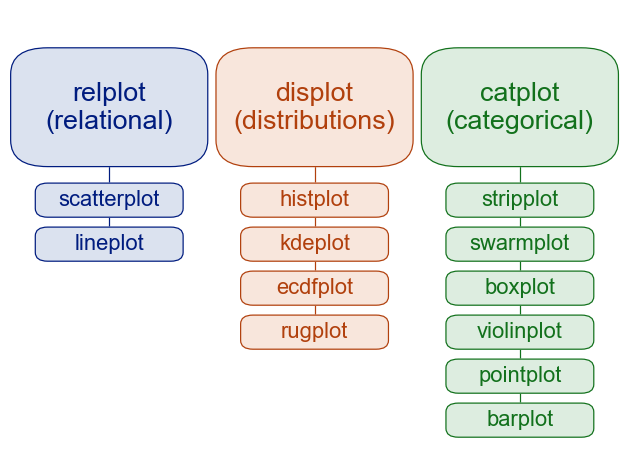

When you use one of the overlapping functions (`relplot()`, `displot()`, or `catplot()`), the default plotting method is the uppermost variant (`scatterplot()`, `histplot()`, and `stripplot()` respectively). It is possible to select a different variant of plot by using the keyword argument `kind` and entering the name of the type of plot you would like to use.

### Statistical estimation

Often, we are interested in the average value of one variable as a function of other variables. Many seaborn functions will automatically perform the statistical estimation that is necessary to answer these questions. 

For our next example we will use the `"fmri"` dataset. This dataset holds information of measurements (signal strength) of different regions of the brain following a specific event. The datapoints are temporal, meaning that they are a measurement over time, and there are many datapoints for different subjects (patients). 

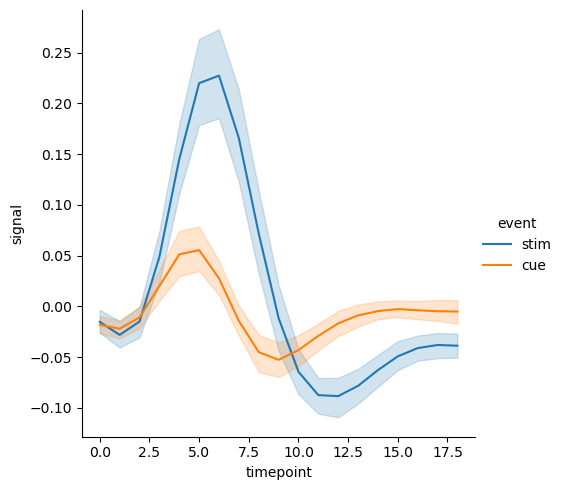

In [4]:
fmri = sns.load_dataset("fmri")

sns.relplot(
    data=fmri, 
    kind="line",
    x="timepoint", 
    y="signal", 
    hue="event"
)

plt.show()

By setting `kind="line"`, thus asking for a lineplot, and setting the horizontal axis to a column holding numerical values, Seaborn automatically assumes that it should average data over all subjects for each timepoint. It even computes confidence intervals and draws error bars representing the uncertainty. There is no need for grouping values yourself! 

It is even possible to estimate trends (and their uncertainty) using a linear regression model using `lmplot()`:

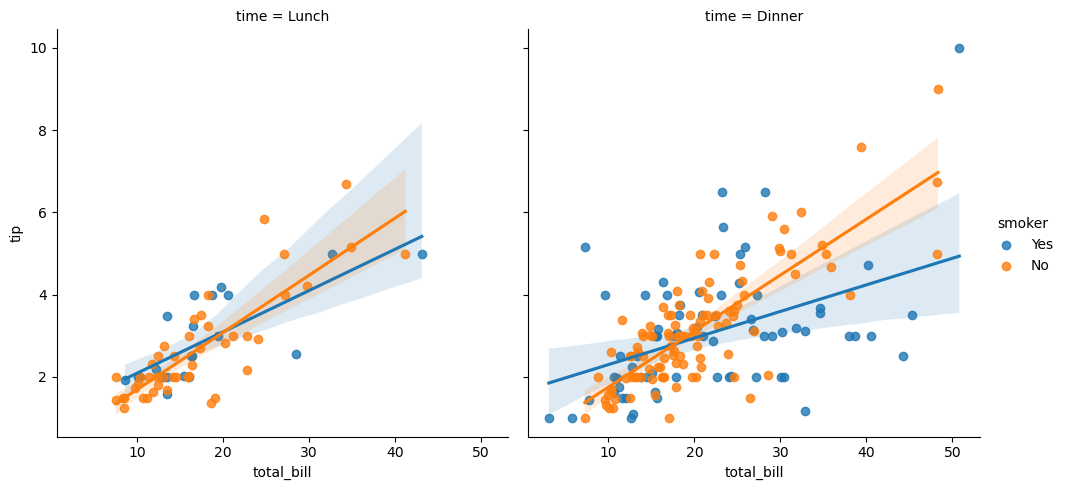

In [5]:
sns.lmplot(data=tips, x="total_bill", y="tip", col="time", hue="smoker")
plt.show()

Showing that in our tips dataset parties containing a smoker generally tip less during dinnertime when the bill is higher. Although we could argue that we do not have sufficient data, because there is a high uncertainty. 

We can also analyse and estimate the distributions of the data:

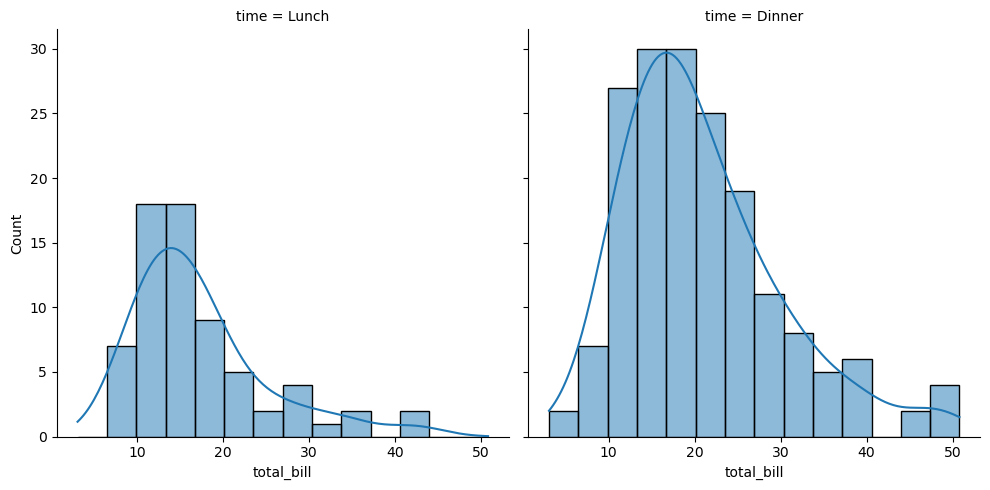

In [6]:
sns.displot(data=tips, x="total_bill", col="time", kde=True)
plt.show()

You might have noticed that we have set `kde=True`. KDE (Kernel Density Estimation) is a method for visualizing the distribution of observations in a dataset; you could see it as the estimated continuous version of a histogram of the data. Relative to a histogram, KDE can produce a plot that is easier to interpret. However, it is not as useful when there is not enough data, or when the underlying distribution is very unsmooth. 

### Plotting categorical data

Seaborn also offers several specialized plots for categorical data. All these plots can be generated by using `catplot()`.

Again, using our tips dataset, we can use this function to show the mean tip for smokers and non-smokers and its confidence interval for every day of the week:

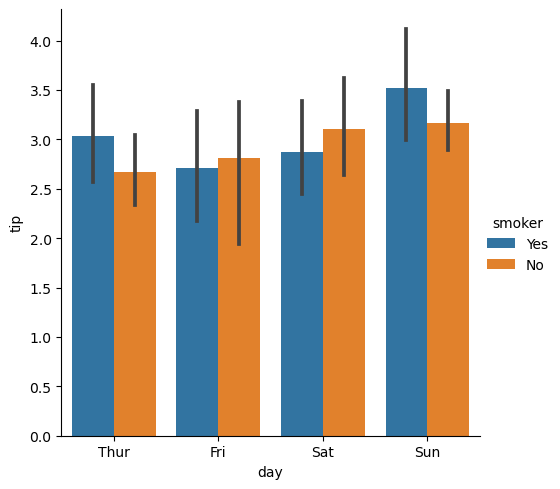

In [7]:
sns.catplot(data=tips, kind="bar", x="day", y="tip", hue="smoker")
plt.show()

Try the code above, but replace `kind="bar"` with `"swarm"` or `"violin"` to see every observation or a distribution density estimation respectively!